In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("covid_19_india.csv")
df1 = pd.read_csv("covid_vaccine_statewise.csv")
df2 = pd.read_csv("StatewiseTestingDetails.csv")

In [3]:
df.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [4]:
df1.head()

Updated On  State  Total Individuals Vaccinated  Total Sessions Conducted  \
0  16/01/2021  India                       48276.0                    3455.0   
1  17/01/2021  India                       58604.0                    8532.0   
2  18/01/2021  India                       99449.0                   13611.0   
3  19/01/2021  India                      195525.0                   17855.0   
4  20/01/2021  India                      251280.0                   25472.0   

   Total Sites   First Dose Administered  Second Dose Administered  \
0        2957.0                  48276.0                       0.0   
1        4954.0                  58604.0                       0.0   
2        6583.0                  99449.0                       0.0   
3        7951.0                 195525.0                       0.0   
4       10504.0                 251280.0                       0.0   

   Male(Individuals Vaccinated)  Female(Individuals Vaccinated)  \
0                       23757.0                         24517.0   
1                       27348.0                         31252.0   
2                       41361.0                         58083.0   
3                       81901.0                        113613.0   
4                       98111.0                        153145.0   

   Transgender(Individuals Vaccinated)  Total Covaxin Administered  \
0                                  2.0                       579.0   
1                                  4.0                       635.0   
2                                  5.0                      1299.0   
3                                 11.0                      3017.0   
4                                 24.0                      3946.0   

   Total CoviShield Administered  AEFI  18-30 years (Age)  30-45 years (Age)  \
0                        47697.0   NaN                NaN                NaN   
1                        57969.0   NaN                NaN                NaN   
2                        98150.0   NaN                NaN                NaN   
3                       192508.0   NaN                NaN                NaN   
4                       247334.0   NaN                NaN                NaN   

   45-60 years (Age)  60+ years (Age)  Total Doses Administered  
0                NaN              NaN                   48276.0  
1                NaN              NaN                   58604.0  
2                NaN              NaN                   99449.0  
3                NaN              NaN                  195525.0  
4                NaN              NaN                  251280.0

In [5]:
df2.head()

Date                        State  TotalSamples Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0

In [6]:
data = df[["State/UnionTerritory", "Cured", "Deaths", "Confirmed"]]

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
data.sort_values(by = "Confirmed", ascending = False, inplace = True)

In [9]:
data.head()

State/UnionTerritory    Cured  Deaths  Confirmed
14674          Maharashtra  4265326   74413    4996758
14638          Maharashtra  4227940   73515    4942736
14602          Maharashtra  4164098   72662    4880542
14566          Maharashtra  4107092   71742    4822902
14530          Maharashtra  4041158   70851    4771022

<Axes: xlabel='Confirmed', ylabel='State/UnionTerritory'>

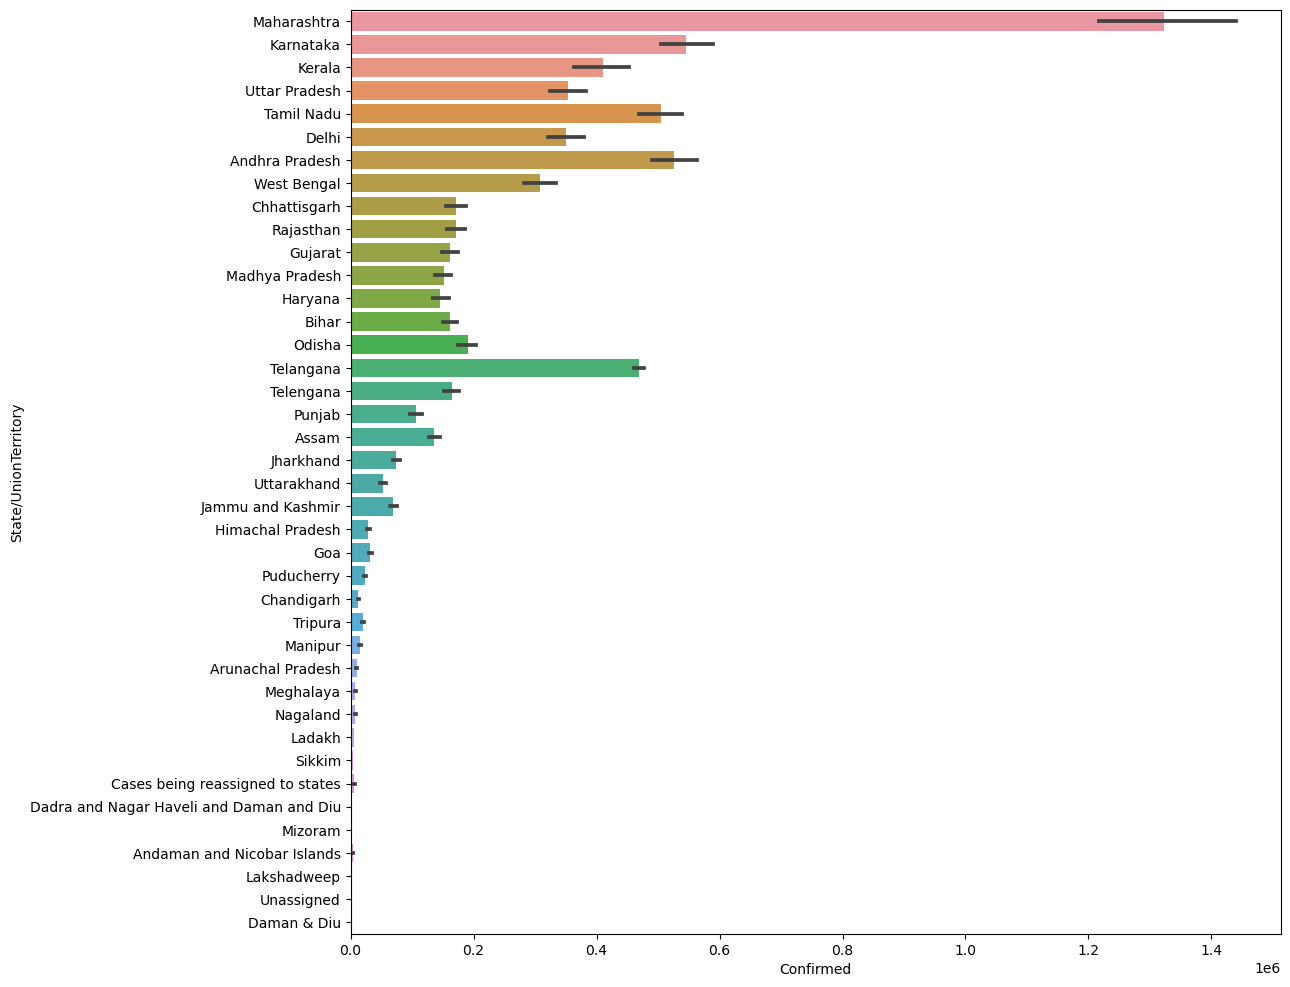

In [10]:
plt.figure(figsize = (12,12))
sns.barplot(x = data["Confirmed"], y = data["State/UnionTerritory"])

In [11]:
data["State/UnionTerritory"].replace("Telengana", "Telangana",inplace =True)

In [12]:
data["State/UnionTerritory"].replace("Daman & Diu","Dadra and Nagar Haveli and Daman and Diu", inplace = True)

In [13]:
data.drop(index = data[data["State/UnionTerritory"] == "Unassigned"].index, inplace = True )

In [14]:
data.drop(index = data[data["State/UnionTerritory"] == "Cases being reassigned to states"].index, inplace = True)

<Axes: xlabel='Confirmed', ylabel='State/UnionTerritory'>

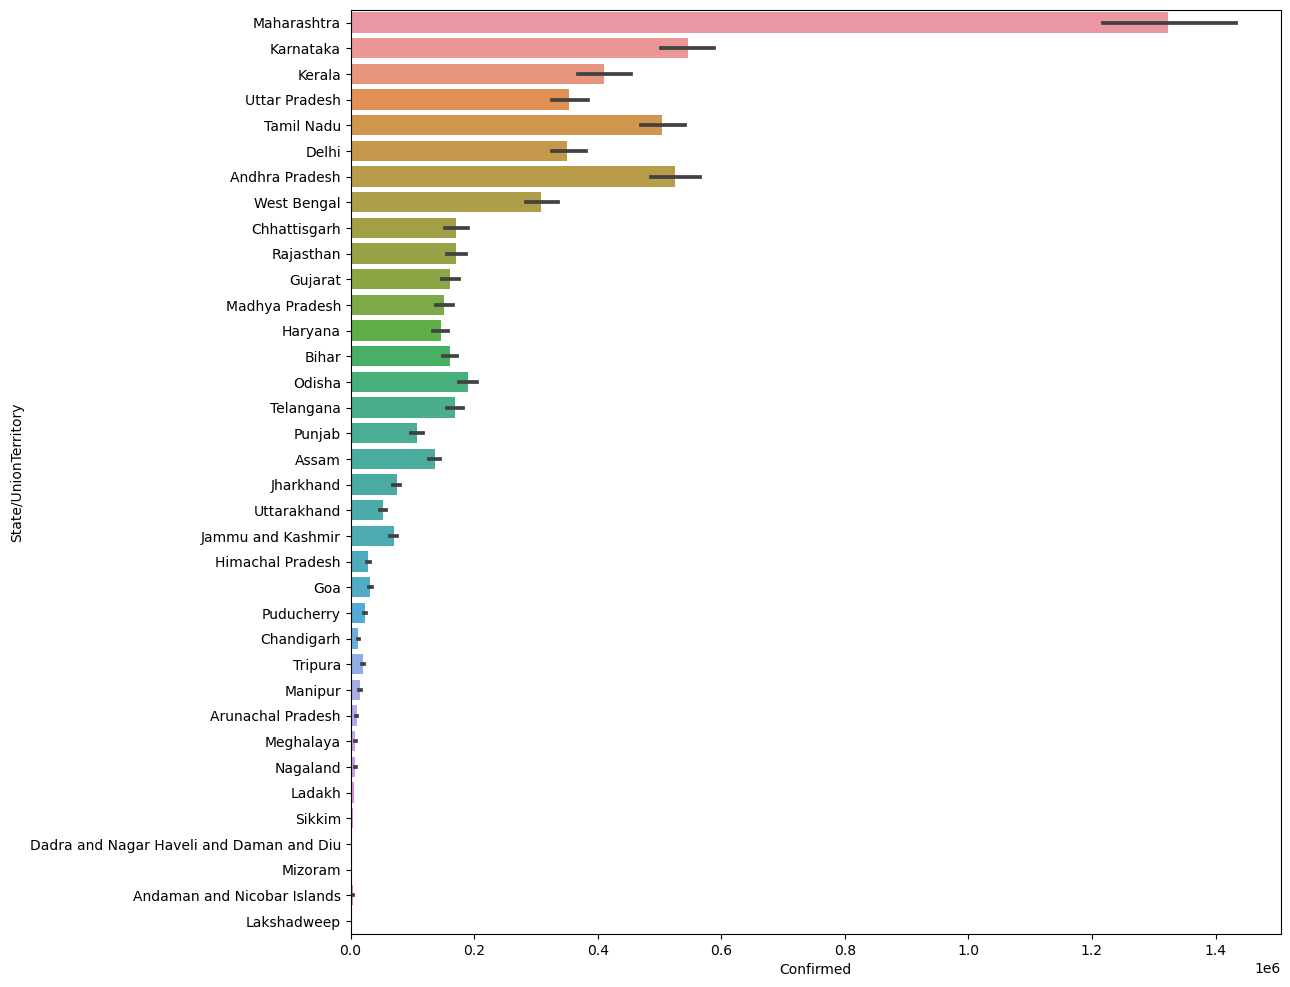

In [15]:
plt.figure(figsize = (12,12))
sns.barplot(x = data["Confirmed"], y = data["State/UnionTerritory"])

Top 5 States which gives highest number of confirmed cases are :-
1> Maharashtra
2> Karnataka
3> Andhra Pradesh
4> Tamil Nadu
5> Kerala

In [16]:
data.Confirmed.max()

4996758

In [17]:
data.Cured.max()

4265326

In [18]:
data.Deaths.max()

74413

In [19]:
data["Active"] = data.Confirmed - (data.Cured + data.Deaths)

In [20]:
data.sort_values(by = "Active", ascending = False, inplace = True)

<Axes: xlabel='Active', ylabel='State/UnionTerritory'>

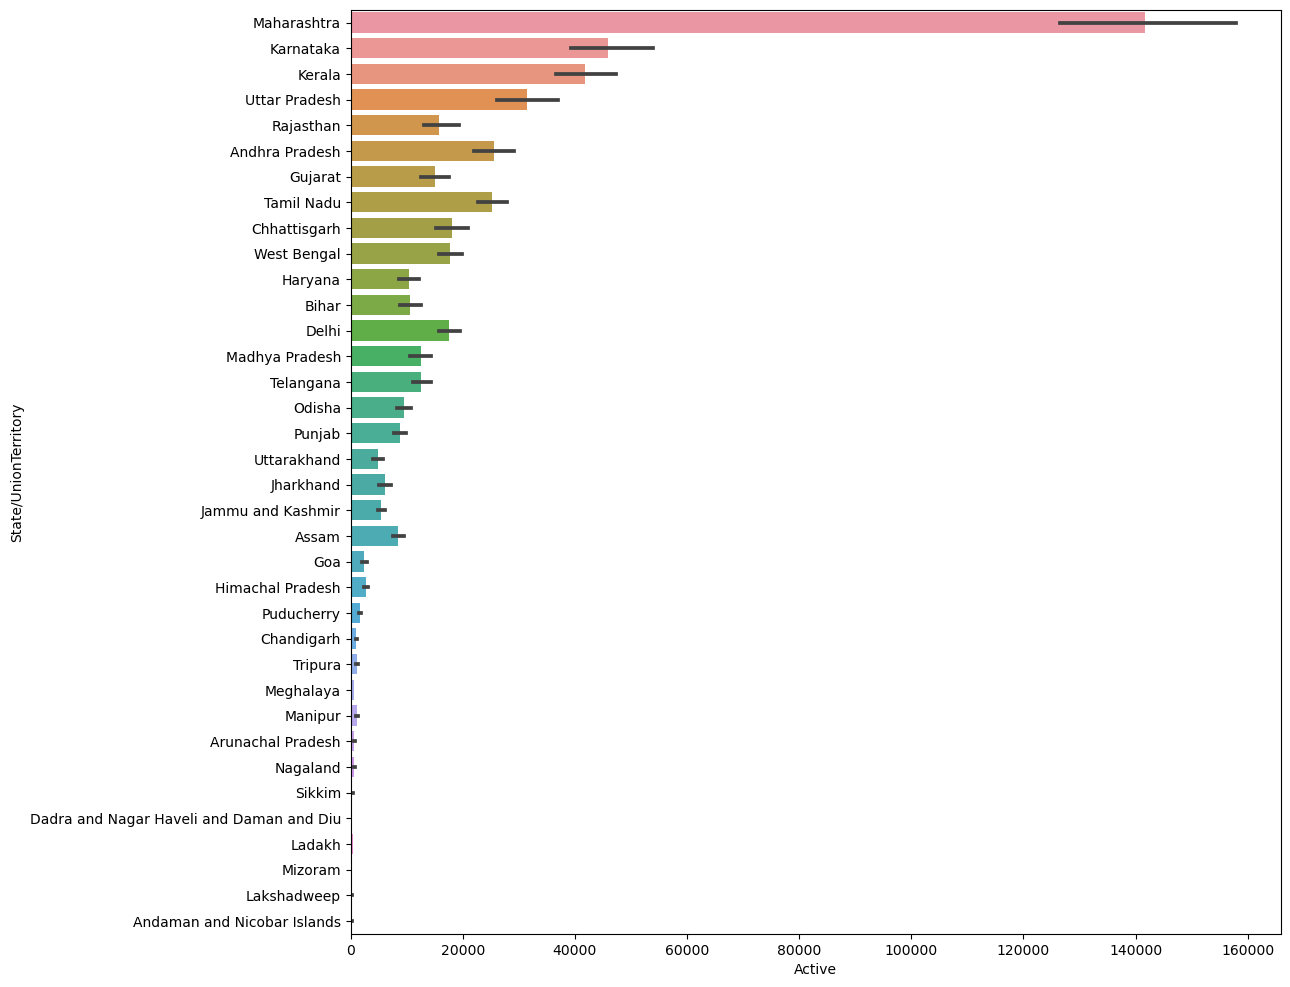

In [21]:
plt.figure(figsize = (12,12))
sns.barplot(x = data["Active"], y = data["State/UnionTerritory"])

Top 5 states having the highest number of active cases are:- 
1> Maharashtra
2> Karnataka
3> Kerala
4> Uttar Pradesh
5> Andhra Pradesh

In [22]:
data.isnull().sum()

State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
Active                  0
dtype: int64

In [23]:
data.sort_values(by = "Deaths", ascending = False, inplace = True)

In [24]:
data.head()

State/UnionTerritory    Cured  Deaths  Confirmed  Active
14674          Maharashtra  4265326   74413    4996758  657019
14638          Maharashtra  4227940   73515    4942736  641281
14602          Maharashtra  4164098   72662    4880542  643782
14566          Maharashtra  4107092   71742    4822902  644068
14530          Maharashtra  4041158   70851    4771022  659013

<Axes: xlabel='Deaths', ylabel='State/UnionTerritory'>

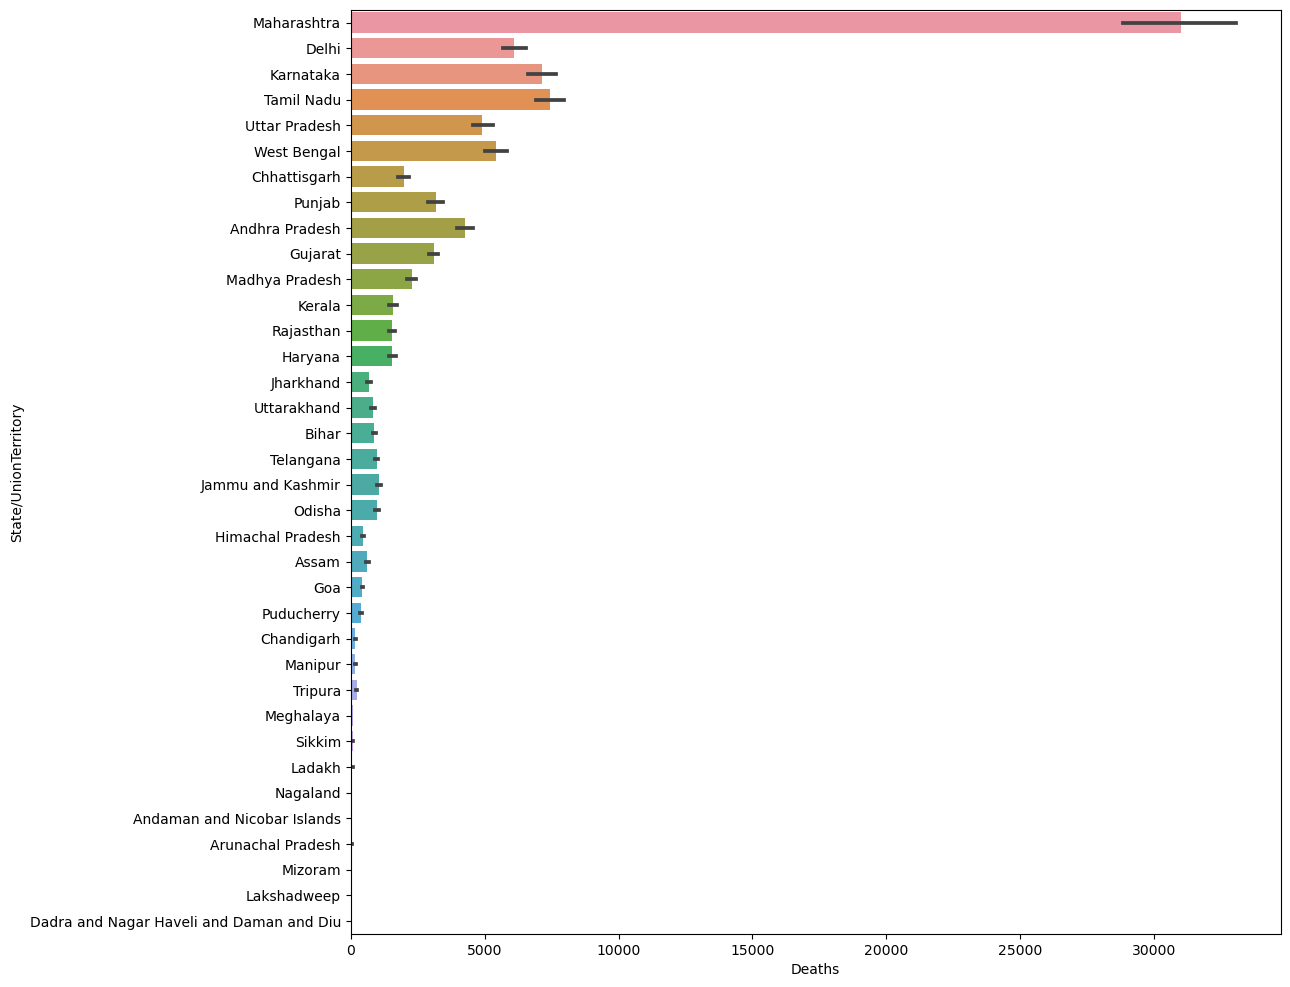

In [25]:
plt.figure(figsize = (12,12))
sns.barplot(y = data["State/UnionTerritory"], x = data["Deaths"])

5 states having maximum number of deaths in India are :-
1> Maharashtra
2> Tamil Nadu
3> Karnataka
4> Delhi
5> West Bengal

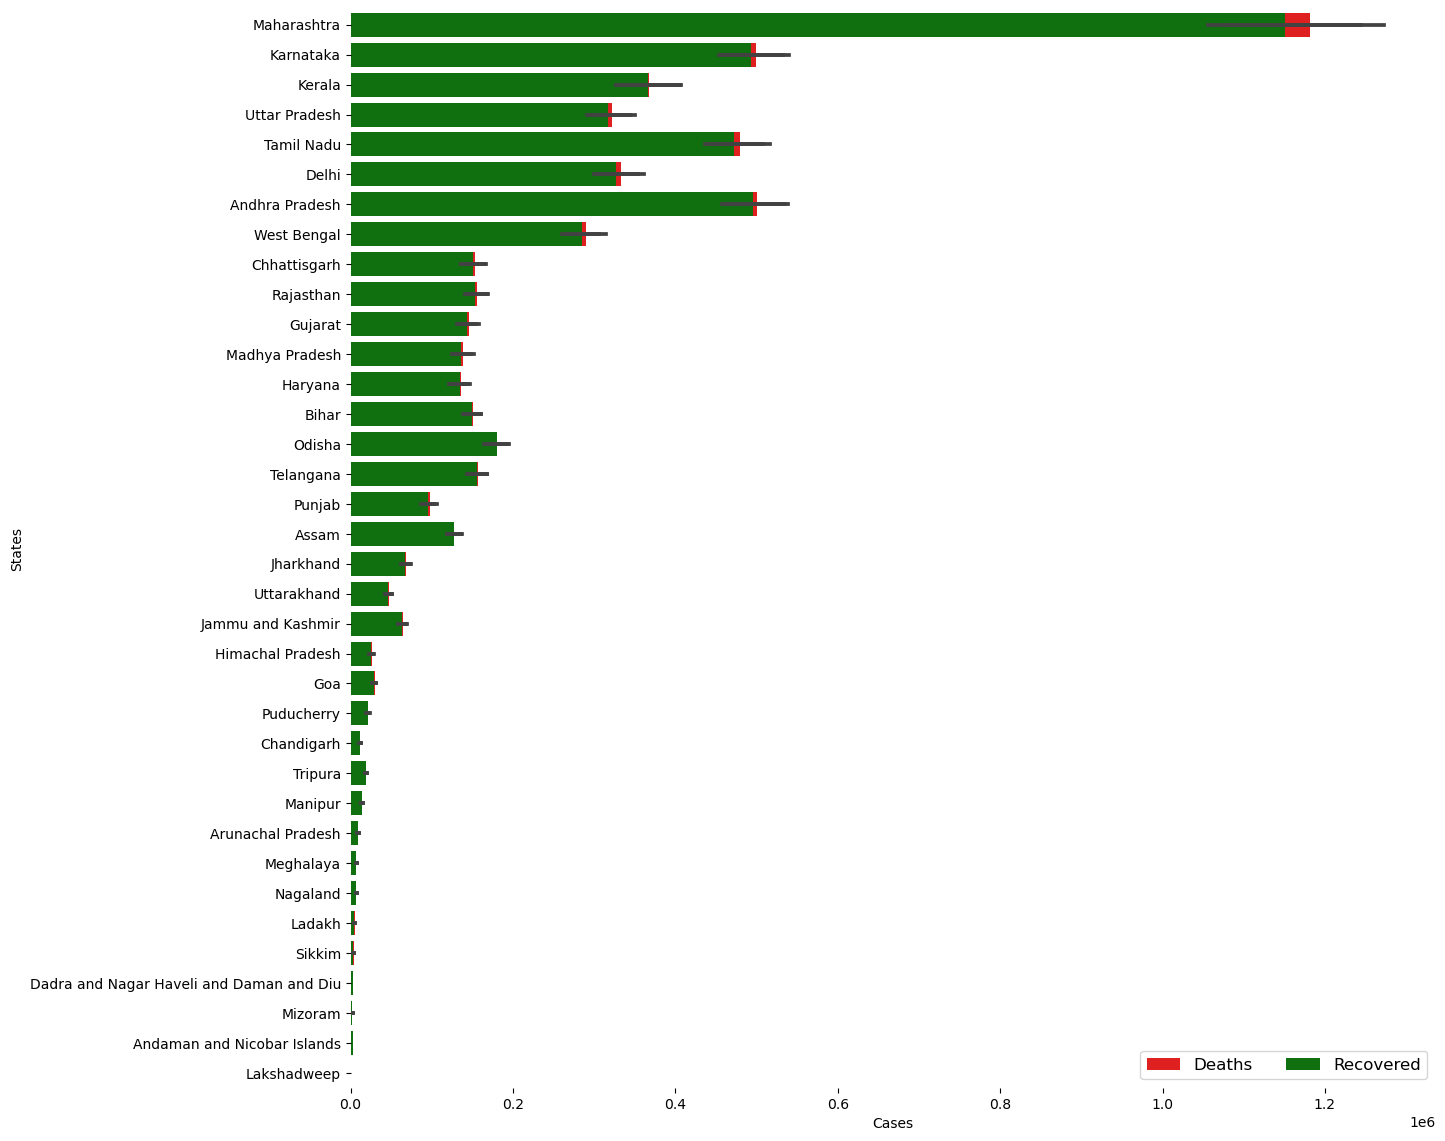

In [26]:
f, ax = plt.subplots(figsize=(14, 14))
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.barplot(x=(data["Confirmed"]-data["Active"]), y=data["State/UnionTerritory"], label="Deaths", color="red")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Recovered", color="green")
ax.legend(loc = "lower right", ncol = 2, frameon = True, fontsize = "large")
ax.set(xlabel = "Cases", ylabel = "States")
sns.despine(left = True, bottom = True)

### Ratio of Recovered and Deaths in India.
Its a very proud movement for India we handled the covid in the best manner as we can see we have very less percentage of Death ratio and more number of recovered ratio till now

In [27]:
import plotly.graph_objects as go

In [28]:
df_india = df.groupby("Date")[["Confirmed", "Cured", "Deaths"]].sum().reset_index()

## Ploting Total cases Troll in India :

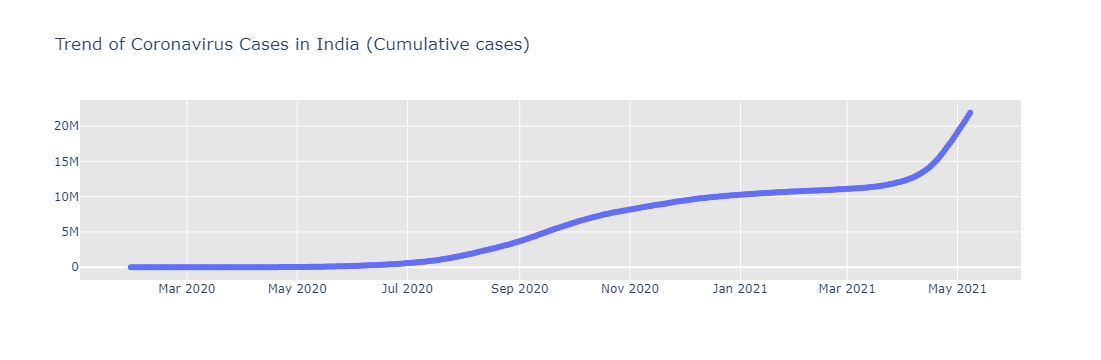

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_india['Date'], y = df_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## Ploting Recovered, Total cases  Troll in India:

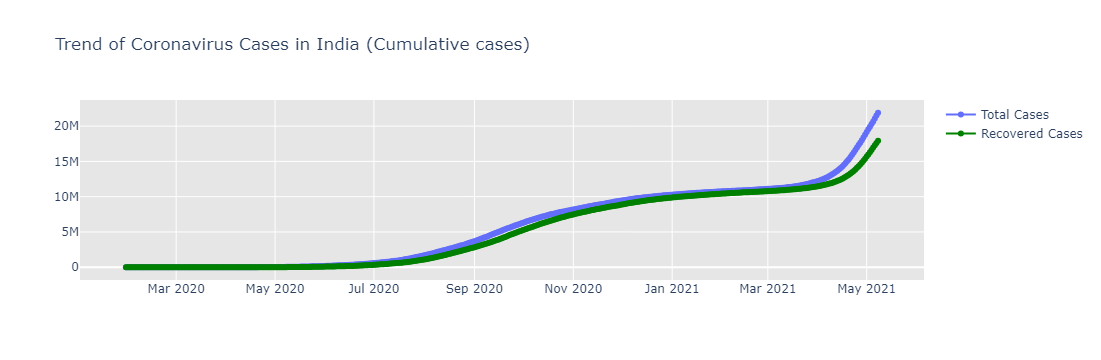

In [30]:
fig.add_trace(go.Scatter(x=df_india['Date'], y = df_india['Cured'], mode='lines+markers',name='Recovered Cases', line = dict(color = "Green", width = 2)))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## Ploting Death, Recovered and Total cases Troll in India :

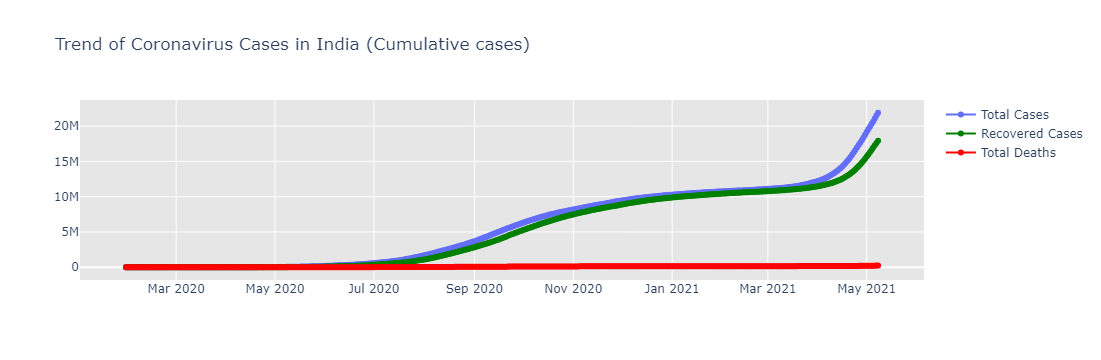

In [31]:
fig.add_trace(go.Scatter(x=df_india['Date'], y = df_india['Deaths'], mode='lines+markers',name='Total Deaths', line = dict(color = "Red", width = 2)))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### Plot of Total cases, Recovered and Deaths in Rajasthan : 

In [32]:
df_Rajasthan = df[df["State/UnionTerritory"] == "Rajasthan"][["Date","Cured", "Deaths", "Confirmed"]].reset_index(drop = True)

In [33]:
df_Rajasthan.head()

Date  Cured  Deaths  Confirmed
0  2020-03-03      0       0          1
1  2020-03-04      0       0         15
2  2020-03-05      0       0         15
3  2020-03-06      0       0         15
4  2020-03-07      0       0         15

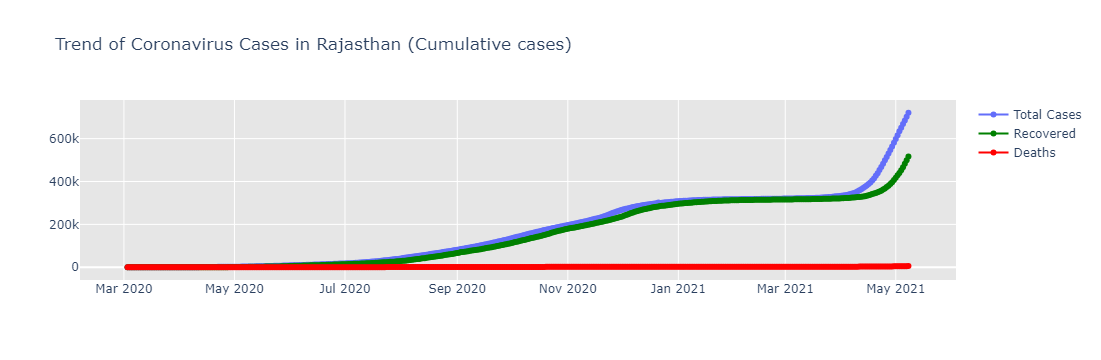

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_Rajasthan['Date'], y = df_Rajasthan['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=df_Rajasthan['Date'], y = df_Rajasthan['Cured'], mode='lines+markers',name='Recovered', line = dict(color = "Green", width = 2)))
fig.add_trace(go.Scatter(x=df_Rajasthan['Date'], y = df_Rajasthan['Deaths'], mode='lines+markers',name='Deaths', line = dict(color = "Red", width = 2)))
fig.update_layout(title_text='Trend of Coronavirus Cases in Rajasthan (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### Plot of Total cases, Recovered and Deaths in UttarPradesh :-

In [35]:
df_UP = df[df["State/UnionTerritory"] == "Uttar Pradesh"][["Date","Cured", "Deaths", "Confirmed"]].reset_index(drop = True)

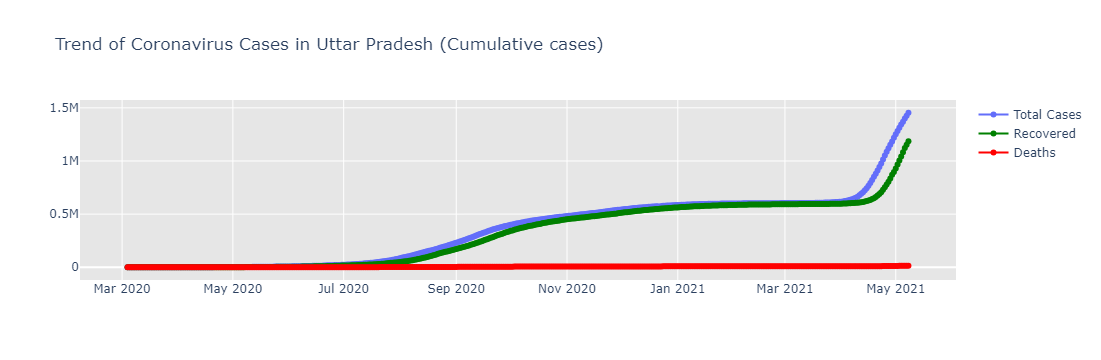

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_UP['Date'], y = df_UP['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=df_UP['Date'], y = df_UP['Cured'], mode='lines+markers',name='Recovered', line = dict(color = "Green", width = 2)))
fig.add_trace(go.Scatter(x=df_UP['Date'], y = df_UP['Deaths'], mode='lines+markers',name='Deaths', line = dict(color = "Red", width = 2)))
fig.update_layout(title_text='Trend of Coronavirus Cases in Uttar Pradesh (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### Plot of Total cases, Recovered and Deaths in Maharashtra :-

In [37]:
df_maharashtra = df[df["State/UnionTerritory"] == "Maharashtra"][["Date","Cured", "Deaths", "Confirmed"]].reset_index(drop = True)

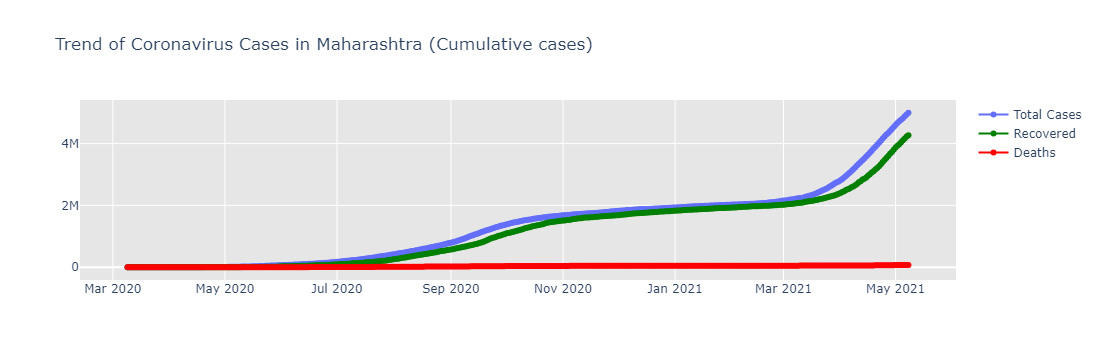

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_maharashtra['Date'], y = df_maharashtra['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=df_maharashtra['Date'], y = df_maharashtra['Cured'], mode='lines+markers',name='Recovered', line = dict(color = "Green", width = 2)))
fig.add_trace(go.Scatter(x=df_maharashtra['Date'], y = df_maharashtra['Deaths'], mode='lines+markers',name='Deaths', line = dict(color = "Red", width = 2)))
fig.update_layout(title_text='Trend of Coronavirus Cases in Maharashtra (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [39]:
df_max_states = df.groupby("State/UnionTerritory")["Confirmed"].max().reset_index()

In [40]:
df_max_states.sort_values(by = "Confirmed", ascending = False, inplace = True)

In [41]:
df_max_states.reset_index(drop = True, inplace = True)

In [42]:
df_max_states.head(10)

State/UnionTerritory  Confirmed
0          Maharashtra    4996758
1            Karnataka    1838885
2               Kerala    1824856
3        Uttar Pradesh    1453679
4           Tamil Nadu    1323965
5                Delhi    1292867
6       Andhra Pradesh    1245374
7          West Bengal     954282
8         Chhattisgarh     830117
9            Rajasthan     720799

In [43]:
state_wise = df.groupby('State/UnionTerritory')[['Confirmed','Cured','Deaths']].sum().reset_index()
state_wise["Death_percentage"] = ((state_wise["Deaths"] / state_wise["Confirmed"]) * 100)
state_wise.style.background_gradient(cmap='magma')

In [44]:
state_wise.nlargest(10,"Death_percentage")["State/UnionTerritory"]

29               Punjab
22          Maharashtra
31               Sikkim
12              Gujarat
39          West Bengal
10                Delhi
28           Puducherry
38          Uttarakhand
14     Himachal Pradesh
15    Jammu and Kashmir
Name: State/UnionTerritory, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Punjab'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Sikkim'),
  Text(3, 0, 'Gujarat'),
  Text(4, 0, 'West Bengal'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Puducherry'),
  Text(7, 0, 'Uttarakhand'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'Jammu and Kashmir')])

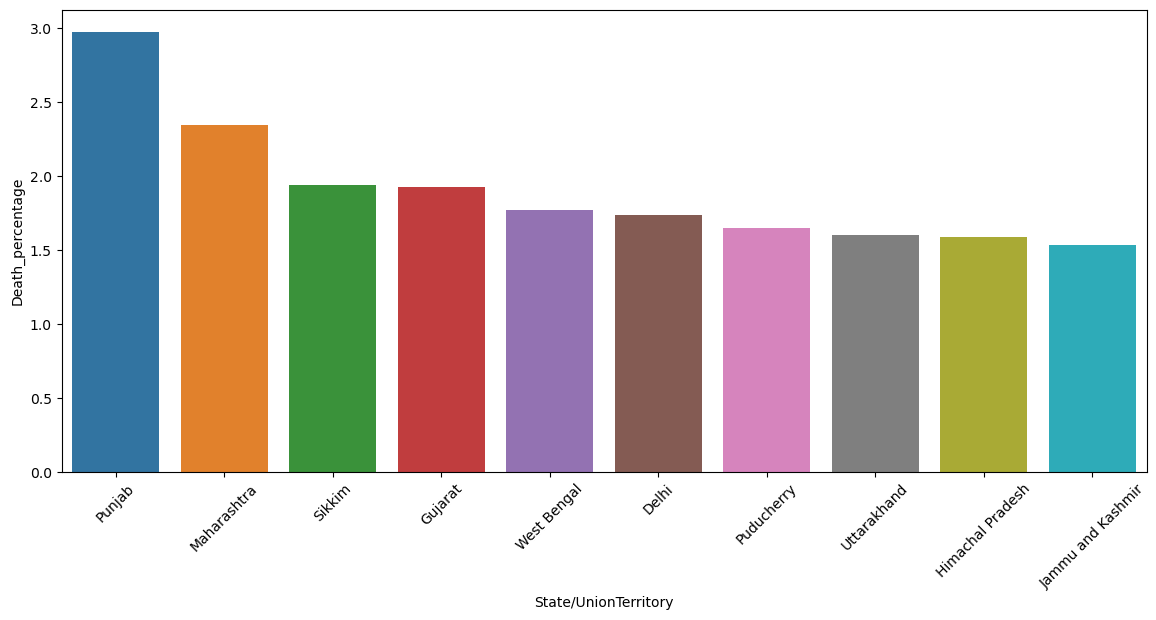

In [45]:
plt.figure(figsize=(14,6))
sns.barplot(x = state_wise.nlargest(10,"Death_percentage")["State/UnionTerritory"] , y= state_wise.nlargest(10,"Death_percentage")['Death_percentage'],data=state_wise)
plt.xticks(rotation=45)

# Vaccine Analysis

In [46]:
df1.head()

Updated On  State  Total Individuals Vaccinated  Total Sessions Conducted  \
0  16/01/2021  India                       48276.0                    3455.0   
1  17/01/2021  India                       58604.0                    8532.0   
2  18/01/2021  India                       99449.0                   13611.0   
3  19/01/2021  India                      195525.0                   17855.0   
4  20/01/2021  India                      251280.0                   25472.0   

   Total Sites   First Dose Administered  Second Dose Administered  \
0        2957.0                  48276.0                       0.0   
1        4954.0                  58604.0                       0.0   
2        6583.0                  99449.0                       0.0   
3        7951.0                 195525.0                       0.0   
4       10504.0                 251280.0                       0.0   

   Male(Individuals Vaccinated)  Female(Individuals Vaccinated)  \
0                       23757.0                         24517.0   
1                       27348.0                         31252.0   
2                       41361.0                         58083.0   
3                       81901.0                        113613.0   
4                       98111.0                        153145.0   

   Transgender(Individuals Vaccinated)  Total Covaxin Administered  \
0                                  2.0                       579.0   
1                                  4.0                       635.0   
2                                  5.0                      1299.0   
3                                 11.0                      3017.0   
4                                 24.0                      3946.0   

   Total CoviShield Administered  AEFI  18-30 years (Age)  30-45 years (Age)  \
0                        47697.0   NaN                NaN                NaN   
1                        57969.0   NaN                NaN                NaN   
2                        98150.0   NaN                NaN                NaN   
3                       192508.0   NaN                NaN                NaN   
4                       247334.0   NaN                NaN                NaN   

   45-60 years (Age)  60+ years (Age)  Total Doses Administered  
0                NaN              NaN                   48276.0  
1                NaN              NaN                   58604.0  
2                NaN              NaN                   99449.0  
3                NaN              NaN                  195525.0  
4                NaN              NaN                  251280.0

In [47]:
df1.isnull().sum()

Updated On                                0
State                                     0
Total Individuals Vaccinated             48
Total Sessions Conducted                 48
Total Sites                              48
First Dose Administered                  48
Second Dose Administered                 48
Male(Individuals Vaccinated)             48
Female(Individuals Vaccinated)           48
Transgender(Individuals Vaccinated)      48
Total Covaxin Administered               48
Total CoviShield Administered            48
AEFI                                   2305
18-30 years (Age)                      2305
30-45 years (Age)                      2305
45-60 years (Age)                      2305
60+ years (Age)                        2305
Total Doses Administered                  1
dtype: int64

In [48]:
df1.shape

(4255, 18)

In [49]:
df1.State.unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [50]:
df1[df1["State"] == "India"]["Total Individuals Vaccinated"].sum()

5259800415.0

In [51]:
df1[df1["State"] == "India"]["Total Sessions Conducted"].sum()

458712887.0

In [52]:
df1[df1["State"] == "India"]["Total Sites "].sum()

5343966.0

In [53]:
male_cum = df1[df1["State"] == "India"]["Male(Individuals Vaccinated)"].sum()
female_cum = df1[df1["State"] == "India"]["Female(Individuals Vaccinated)"].sum()
trans_cum = df1[df1["State"] == "India"]["Transgender(Individuals Vaccinated)"].sum()

([<matplotlib.patches.Wedge at 0x1b0cb00c850>,
 [Text(-0.07815025509574697, 1.0972203687630255, 'Male'),
  Text(0.07772587499806173, -1.097250513035098, 'Female'),
  Text(1.0999999176927857, -0.00042553009842432915, 'Transgender')],
 [Text(-0.04262741187040744, 0.5984838375071048, '52.3%'),
  Text(0.04239593181712458, -0.5985002798373261, '47.7%'),
  Text(0.5999999551051558, -0.00023210732641327041, '0.0%')])

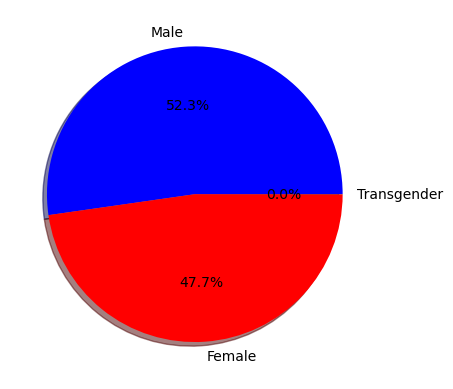

In [54]:
plt.pie([male_cum, female_cum, trans_cum], labels = ["Male", "Female", "Transgender"], colors = ["Blue", "Red", "Green"], autopct = "%1.1f%%", shadow = True, )

([<matplotlib.patches.Wedge at 0x1b0cb04fe90>,
 [Text(1.055480016894655, 0.3097772327593804, 'Covaxin'),
  Text(-1.055480024145514, -0.3097772080540875, 'CoviShield')],
 [Text(0.5757163728516299, 0.16896939968693475, '9.1%'),
  Text(-0.5757163768066439, -0.16896938621132043, '90.9%')])

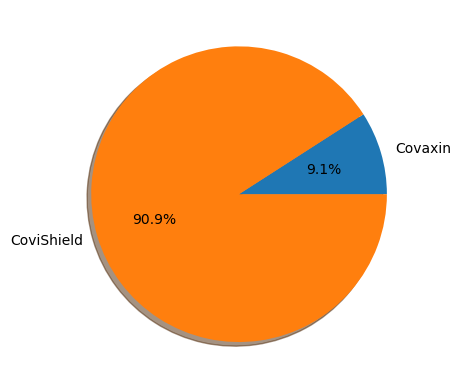

In [55]:
plt.pie([df1[df1["State"] == "India"]["Total Covaxin Administered"].sum(), df1[df1["State"] == "India"]["Total CoviShield Administered"].sum()], labels = ["Covaxin", "CoviShield"], autopct = "%1.1f%%", shadow = True)

([<matplotlib.patches.Wedge at 0x1b0cb09b7d0>,
 [Text(-0.9767337764565096, 0.5059556600424641, 'First Dose'),
  Text(0.9767338238274931, -0.5059555685940456, 'Second Dose')],
 [Text(-0.532763878067187, 0.27597581456861675, '84.8%'),
  Text(0.5327639039059052, -0.2759757646876612, '15.2%')])

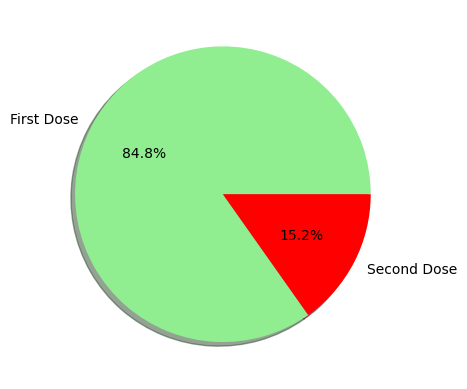

In [56]:
plt.pie([df1[df1["State"] == "India"]["First Dose Administered"].sum(), df1[df1["State"] == "India"]["Second Dose Administered"].sum()], labels = ["First Dose", "Second Dose"], colors = ["lightGreen", "red"], autopct = "%1.1f%%", shadow = True)

In [57]:
df1_vaccine_sum = df1.groupby("State")[['Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered', 'AEFI',
       '18-30 years (Age)', '30-45 years (Age)', '45-60 years (Age)',
       '60+ years (Age)', 'Total Doses Administered']].sum().reset_index()

In [58]:
df1_vaccine_sum.sort_values("Total Individuals Vaccinated", ascending = False, inplace = True)

<Axes: xlabel='Total Individuals Vaccinated', ylabel='State'>

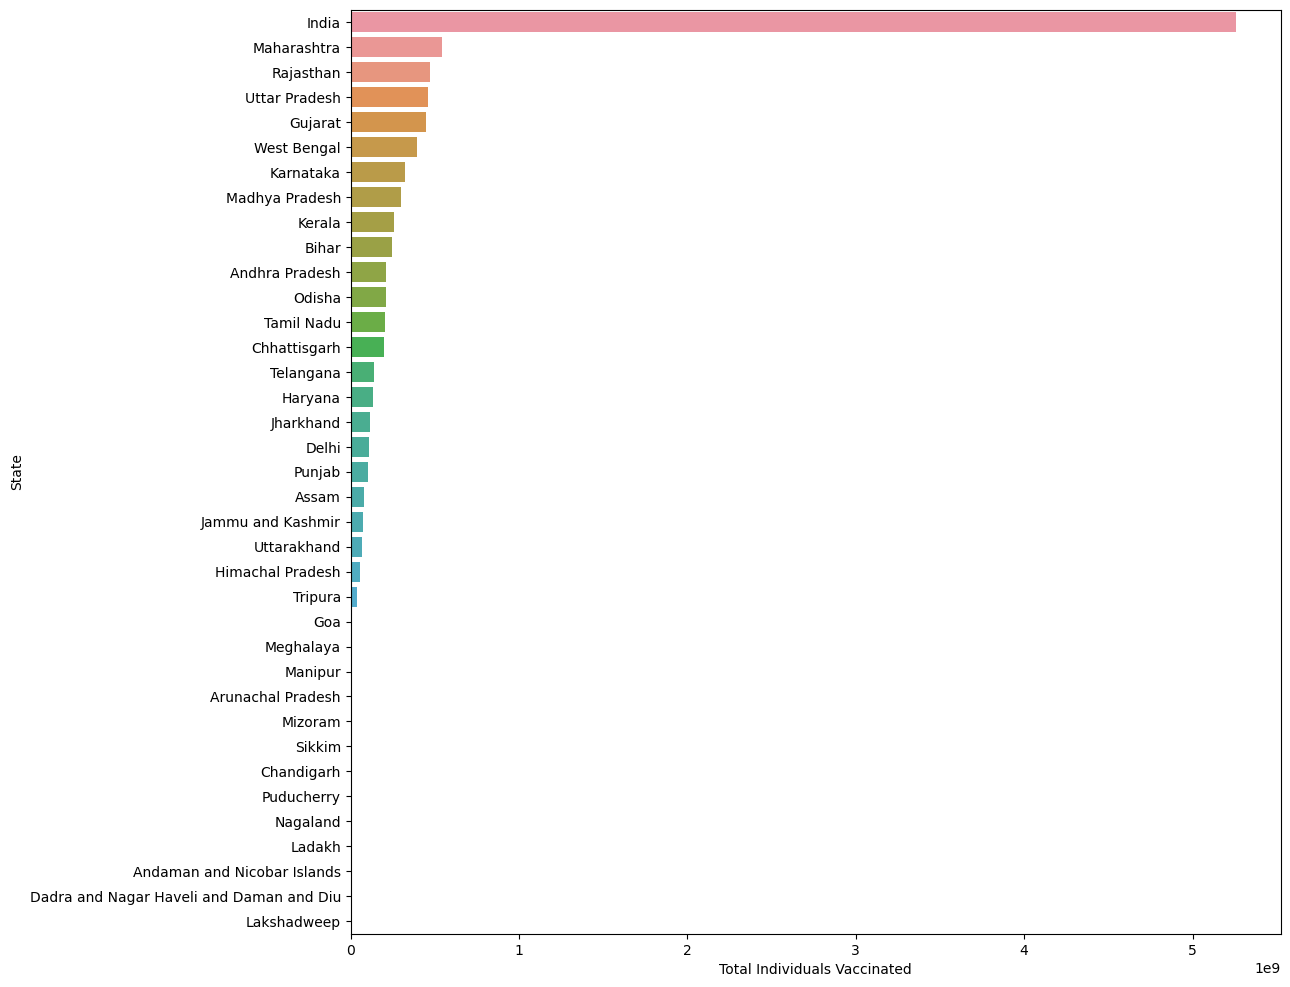

In [59]:
plt.figure(figsize = (12,12))
sns.barplot(x = df1_vaccine_sum["Total Individuals Vaccinated"], y = df1_vaccine_sum["State"])

### States having more number of  Total individual vaccinated than other states are:-
1> Maharashtra
2> Rajasthan
3> Uttar Pradesh
4> Gujarat
5> West Bengal

### Maharashtra Vaccine data :-

([<matplotlib.patches.Wedge at 0x1b0cb2811d0>,
 [Text(-0.12635544732429982, 1.0927187657084856, 'Male'),
  Text(0.1259129561120618, -1.0927698419535206, 'Female'),
  Text(1.0999999096820254, -0.00044575726166572286, 'Transgender')],
 [Text(-0.0689211530859817, 0.5960284176591739, '53.7%'),
  Text(0.06867979424294278, -0.596056277429193, '46.3%'),
  Text(0.5999999507356502, -0.0002431403245449397, '0.0%')])

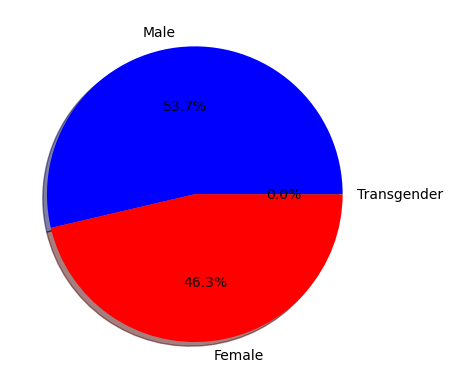

In [60]:
plt.pie([df1[df1["State"] == "Maharashtra"]["Male(Individuals Vaccinated)"].sum(), df1[df1["State"] == "Maharashtra"]["Female(Individuals Vaccinated)"].sum(), df1[df1["State"] == "Maharashtra"]["Transgender(Individuals Vaccinated)"].sum()], labels = ["Male", "Female", "Transgender"], colors = ["Blue", "Red", "Green"], autopct = "%1.1f%%", shadow = True )

([<matplotlib.patches.Wedge at 0x1b0cb2c2f90>,
 [Text(1.044144554549136, 0.34606668317737066, 'Covaxin'),
  Text(-1.0441445869502328, -0.34606658541750046, 'CoviShield')],
 [Text(0.5695333933904377, 0.18876364536947488, '10.2%'),
  Text(-0.5695334110637632, -0.1887635920459093, '89.8%')])

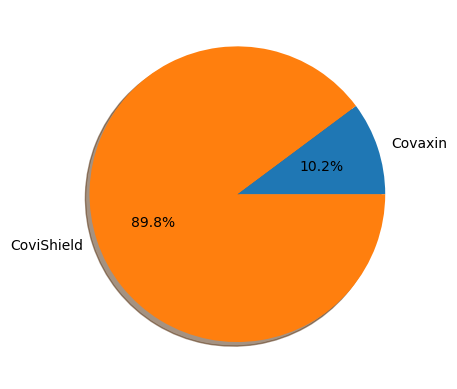

In [61]:
plt.pie([df1[df1["State"] == "Maharashtra"]["Total Covaxin Administered"].sum(), df1[df1["State"] == "Maharashtra"]["Total CoviShield Administered"].sum()], labels = ["Covaxin", "CoviShield"], autopct = "%1.1f%%", shadow = True)

([<matplotlib.patches.Wedge at 0x1b0cb30f8d0>,
 [Text(-1.0050283228803079, 0.4471219858253405, 'First Dose'),
  Text(1.0050282810177218, -0.44712207992288133, 'Second Dose')],
 [Text(-0.5481972670256223, 0.2438847195410948, '86.7%'),
  Text(0.5481972441914845, -0.24388477086702615, '13.3%')])

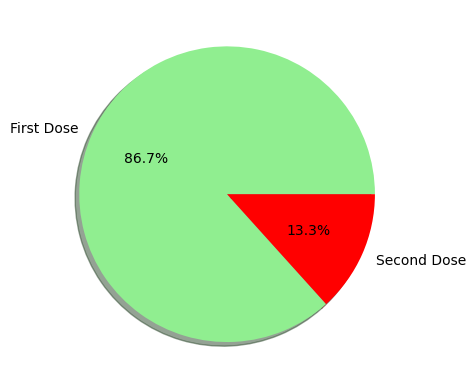

In [62]:
plt.pie([df1[df1["State"] == "Maharashtra"]["First Dose Administered"].sum(), df1[df1["State"] == "Maharashtra"]["Second Dose Administered"].sum()], labels = ["First Dose", "Second Dose"], colors = ["lightGreen", "red"], autopct = "%1.1f%%", shadow = True)

## Rajasthan

([<matplotlib.patches.Wedge at 0x1b0cb367990>,
 [Text(-0.0545521262323078, 1.0986464697633787, 'Male'),
  Text(0.05410456608382636, -1.098668601503147, 'Female'),
  Text(1.0999999087592935, -0.00044802851037106735, 'Transgender')],
 [Text(-0.02975570521762243, 0.5992617107800247, '51.6%'),
  Text(0.029511581500268922, -0.5992737826380802, '48.4%'),
  Text(0.5999999502323419, -0.0002443791874751276, '0.0%')])

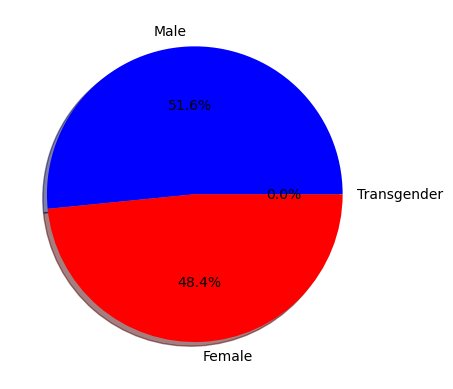

In [63]:
plt.pie([df1[df1["State"] == "Rajasthan"]["Male(Individuals Vaccinated)"].sum(), df1[df1["State"] == "Rajasthan"]["Female(Individuals Vaccinated)"].sum(), df1[df1["State"] == "Rajasthan"]["Transgender(Individuals Vaccinated)"].sum()], labels = ["Male", "Female", "Transgender"], colors = ["Blue", "Red", "Green"], autopct = "%1.1f%%", shadow = True )

([<matplotlib.patches.Wedge at 0x1b0cb6c5fd0>,
 [Text(1.081741207602558, 0.199589478115856, 'Covaxin'),
  Text(-1.0817412613274011, -0.1995891869360752, 'CoviShield')],
 [Text(0.5900406586923043, 0.10886698806319417, '5.8%'),
  Text(-0.5900406879967641, -0.10886682923785919, '94.2%')])

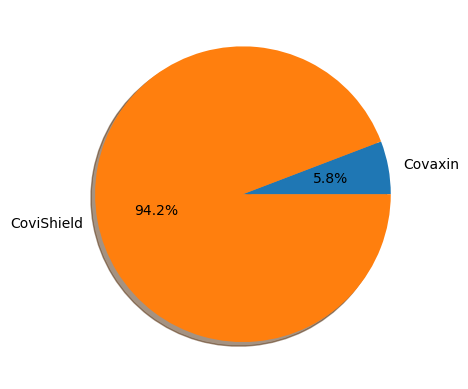

In [64]:
plt.pie([df1[df1["State"] == "Rajasthan"]["Total Covaxin Administered"].sum(), df1[df1["State"] == "Rajasthan"]["Total CoviShield Administered"].sum()], labels = ["Covaxin", "CoviShield"], autopct = "%1.1f%%", shadow = True)

([<matplotlib.patches.Wedge at 0x1b0cb719ed0>,
 [Text(-0.9857177918849693, 0.4882217065651837, 'First Dose'),
  Text(0.985717814740276, -0.48822166042040277, 'Second Dose')],
 [Text(-0.5376642501190741, 0.26630274903555473, '85.4%'),
  Text(0.537664262585605, -0.2663027238656742, '14.6%')])

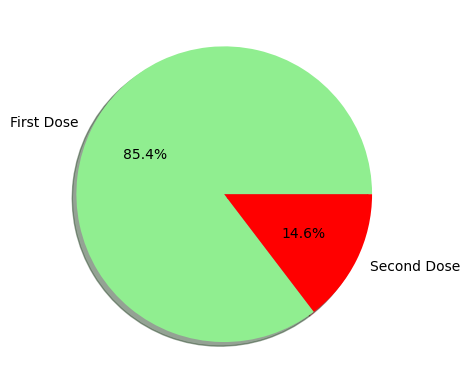

In [65]:
plt.pie([df1[df1["State"] == "Rajasthan"]["First Dose Administered"].sum(), df1[df1["State"] == "Rajasthan"]["Second Dose Administered"].sum()], labels = ["First Dose", "Second Dose"], colors = ["lightGreen", "red"], autopct = "%1.1f%%", shadow = True)

## UttarPradesh

([<matplotlib.patches.Wedge at 0x1b0cb76a5d0>,
 [Text(-0.21341437164184437, 1.0790988397624737, 'Male'),
  Text(0.21295202723501847, -1.0791901751297108, 'Female'),
  Text(1.0999998991344169, -0.000471067164011825, 'Transgender')],
 [Text(-0.11640783907736965, 0.5885993671431674, '56.2%'),
  Text(0.11615565121910097, -0.5886491864343877, '43.8%'),
  Text(0.599999944982409, -0.0002569457258246318, '0.0%')])

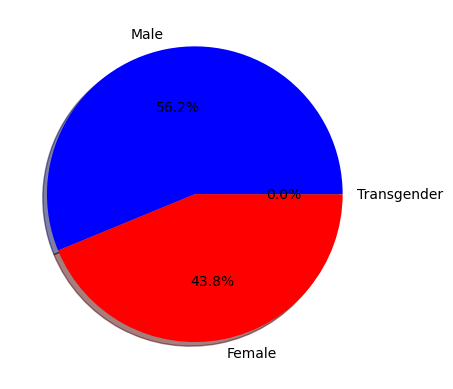

In [66]:
plt.pie([df1[df1["State"] == "Uttar Pradesh"]["Male(Individuals Vaccinated)"].sum(), df1[df1["State"] == "Uttar Pradesh"]["Female(Individuals Vaccinated)"].sum(), df1[df1["State"] == "Uttar Pradesh"]["Transgender(Individuals Vaccinated)"].sum()], labels = ["Male", "Female", "Transgender"], colors = ["Blue", "Red", "Green"], autopct = "%1.1f%%", shadow = True )

([<matplotlib.patches.Wedge at 0x1b0cb780a10>,
 [Text(1.0436315725029852, 0.3476106167465923, 'Covaxin'),
  Text(-1.0436316375942767, -0.3476104213229065, 'CoviShield')],
 [Text(0.5692535850016283, 0.1896057909526867, '10.2%'),
  Text(-0.569253620505969, -0.18960568435794897, '89.8%')])

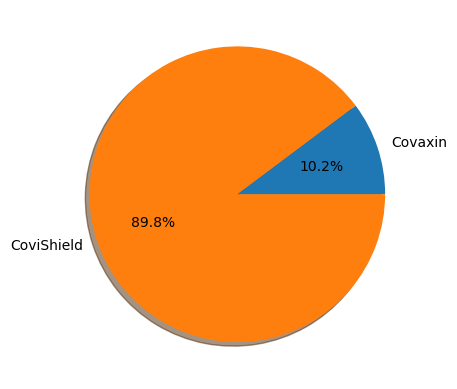

In [67]:
plt.pie([df1[df1["State"] == "Uttar Pradesh"]["Total Covaxin Administered"].sum(), df1[df1["State"] == "Uttar Pradesh"]["Total CoviShield Administered"].sum()], labels = ["Covaxin", "CoviShield"], autopct = "%1.1f%%", shadow = True)

([<matplotlib.patches.Wedge at 0x1b0cb783bd0>,
 [Text(-0.9428751641446201, 0.566556638686068, 'First Dose'),
  Text(0.9428751376221889, -0.5665566828252391, 'Second Dose')],
 [Text(-0.5142955440788837, 0.3090308938287643, '82.8%'),
  Text(0.514295529612103, -0.3090309179046758, '17.2%')])

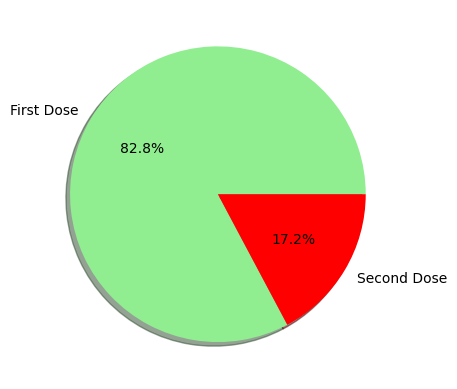

In [68]:
plt.pie([df1[df1["State"] == "Uttar Pradesh"]["First Dose Administered"].sum(), df1[df1["State"] == "Uttar Pradesh"]["Second Dose Administered"].sum()], labels = ["First Dose", "Second Dose"], colors = ["lightGreen", "red"], autopct = "%1.1f%%", shadow = True)

# Test Cases

In [69]:
df2.head()

Date                        State  TotalSamples Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0

In [70]:
df2.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        7002
Positive        7580
dtype: int64

In [71]:
df2.fillna(0, inplace = True)

In [72]:
df2.Negative = df2.Negative.astype(str)

In [73]:
df2.Negative.replace(" ", 0, inplace = True)

In [74]:
df2.Negative = df2.Negative.astype(int)

In [75]:
df2.sort_values("TotalSamples", inplace = True, ascending = False)

<Axes: xlabel='TotalSamples', ylabel='State'>

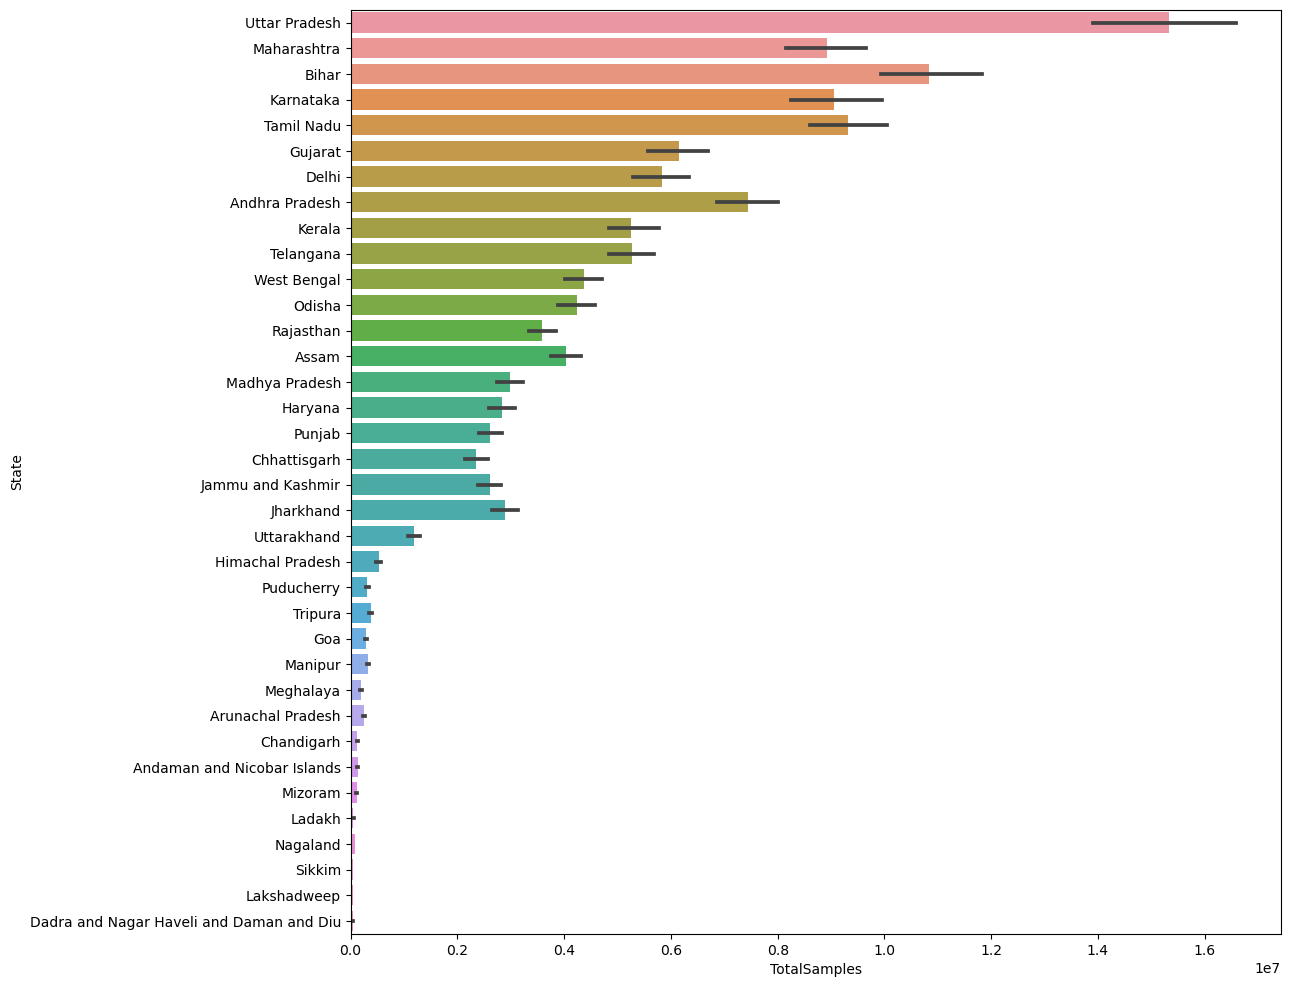

In [76]:
plt.figure(figsize = (12,12))
sns.barplot(x = df2["TotalSamples"], y = df2["State"])

In [77]:
df2.sort_values("Negative", inplace = True, ascending = False)

<Axes: xlabel='Negative', ylabel='State'>

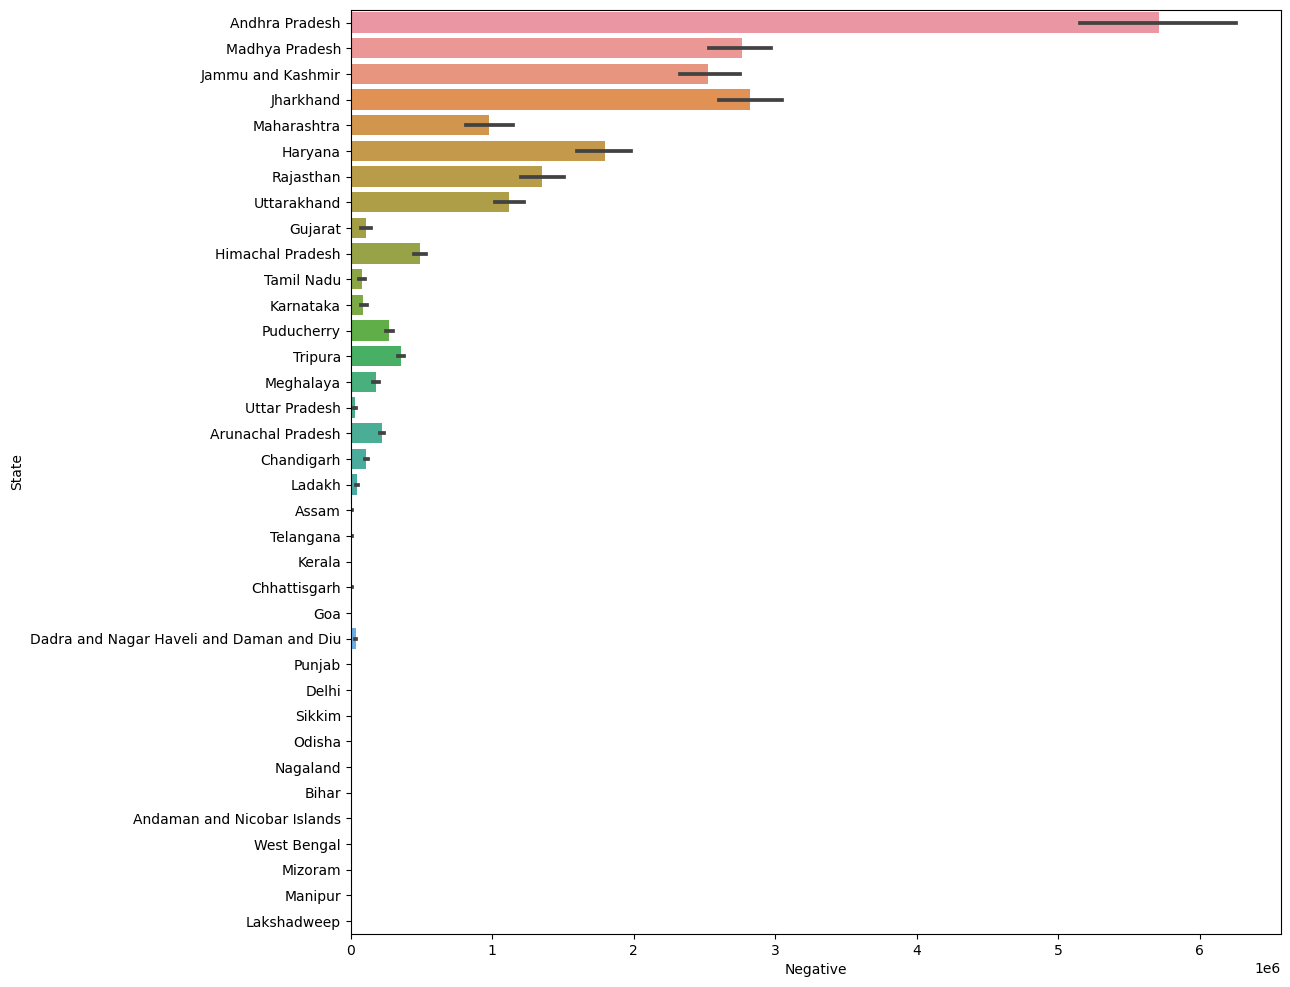

In [78]:
plt.figure(figsize = (12,12))
sns.barplot(x = df2["Negative"], y = df2["State"])

In [79]:
df2.sort_values("Positive", inplace = True, ascending = False)

<Axes: xlabel='Positive', ylabel='State'>

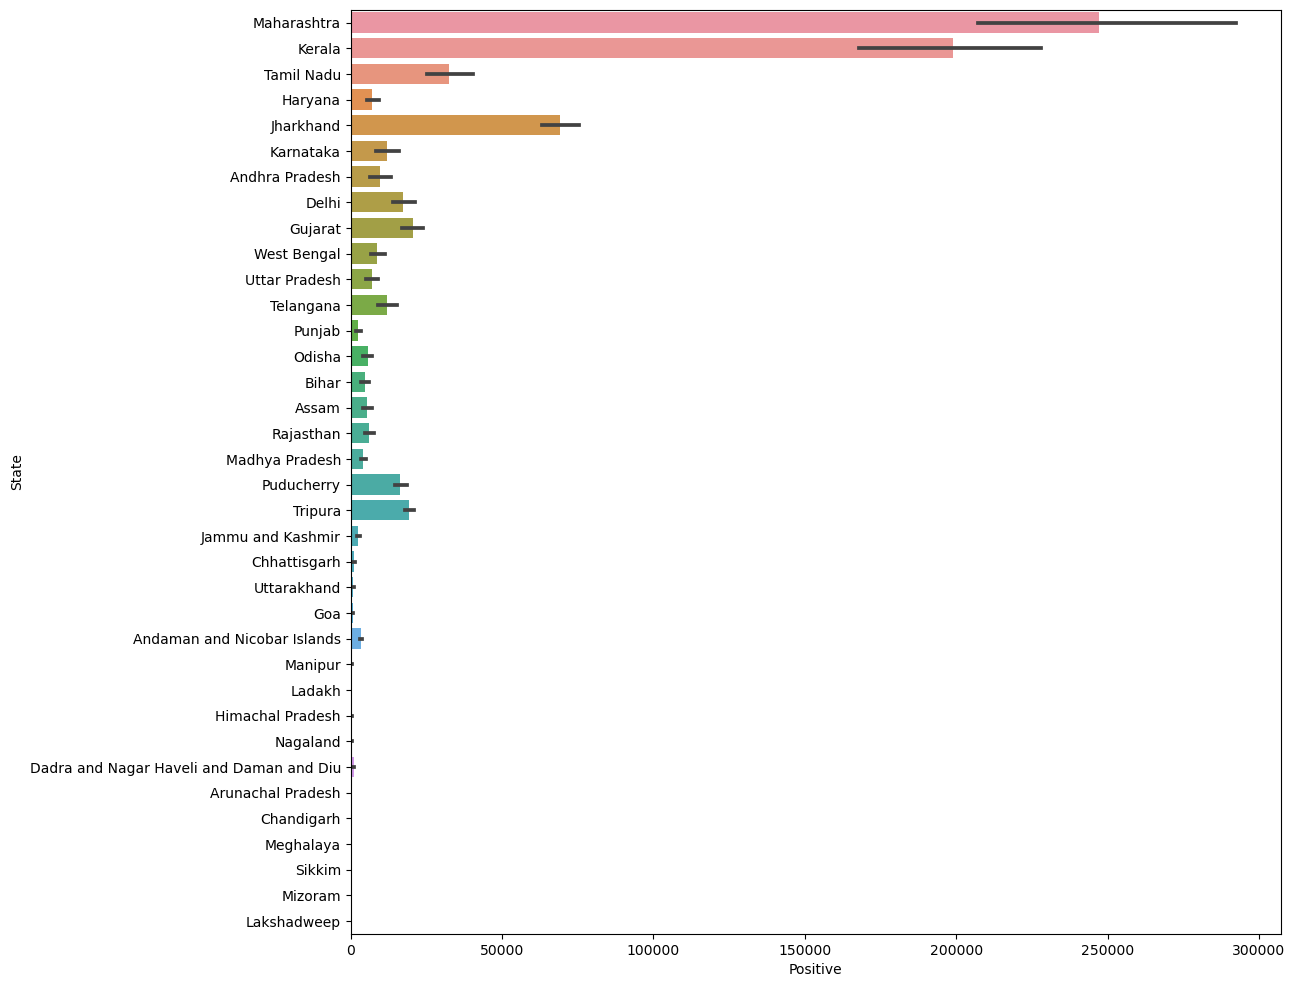

In [80]:
plt.figure(figsize = (12,12))
sns.barplot(x = df2["Positive"], y = df2["State"])

([<matplotlib.patches.Wedge at 0x1b0c8408a10>,
 [Text(-0.9989394845639757, 0.4605647687123481, 'Pending'),
  Text(0.7843925065106091, -0.7711863560320582, 'Positive'),
  Text(1.0352198981000849, -0.3719136493564738, 'Negative')],
 [Text(-0.5448760824894412, 0.25121714657037164, '86.2%'),
  Text(0.4278504580966958, -0.42064710329021354, '2.8%'),
  Text(0.5646653989636826, -0.2028619905580766, '11.0%')])

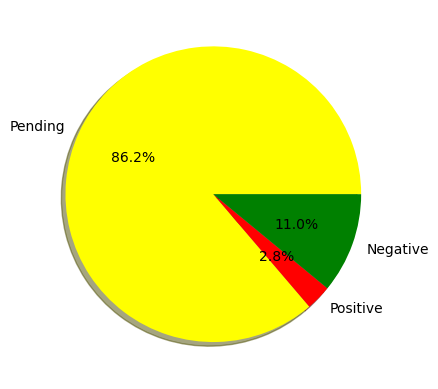

In [81]:
plt.pie([df2[df2["State"] == "Maharashtra"]["TotalSamples"].sum()-(df2[df2["State"] == "Maharashtra"]["Positive"].sum() + df2[df2["State"] == "Maharashtra"]["Negative"].sum()), df2[df2["State"] == "Maharashtra"]["Positive"].sum(), df2[df2["State"] == "Maharashtra"]["Negative"].sum()], labels = ["Pending", "Positive","Negative"], colors = ["Yellow", "red", "Green"], autopct = "%1.1f%%", shadow = True)

([<matplotlib.patches.Wedge at 0x1b0cd23dd10>,
 [Text(-1.099971849641286, 0.00786956140633066, 'Pending'),
  Text(1.0999087345539096, -0.014169532526428521, 'Positive'),
  Text(1.09998195861959, -0.006300056460904585, 'Negative')],
 [Text(-0.5999846452588833, 0.004292488039816723, '99.8%'),
  Text(0.5999502188475869, -0.007728835923506465, '0.0%'),
  Text(0.599990159247049, -0.0034363944332206826, '0.2%')])

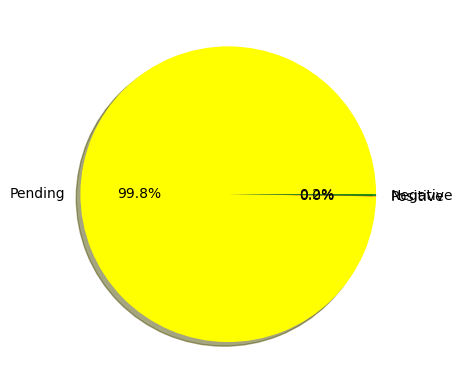

In [82]:
plt.pie([df2[df2["State"] == "Uttar Pradesh"]["TotalSamples"].sum()-(df2[df2["State"] == "Uttar Pradesh"]["Positive"].sum() + df2[df2["State"] == "Uttar Pradesh"]["Negative"].sum()), df2[df2["State"] == "Uttar Pradesh"]["Positive"].sum(), df2[df2["State"] == "Uttar Pradesh"]["Negative"].sum()], labels = ["Pending", "Positive","Negative"], colors = ["Yellow", "red", "Green"], autopct = "%1.1f%%", shadow = True) 

([<matplotlib.patches.Wedge at 0x1b0cd29cb50>,
 [Text(-0.40479912929506484, 1.022808713749525, 'Pending'),
  Text(-0.797971541702122, -0.757127082221696, 'Positive'),
  Text(0.41034354420474056, -1.0205969702725421, 'Negative')],
 [Text(-0.22079952507003534, 0.5578956620451954, '62.0%'),
  Text(-0.4352572045647938, -0.4129784084845614, '0.2%'),
  Text(0.2238237513844039, -0.5566892565122957, '37.8%')])

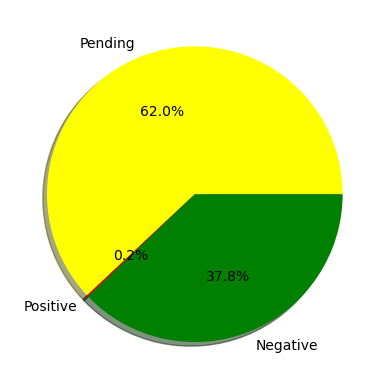

In [83]:
plt.pie([df2[df2["State"] == "Rajasthan"]["TotalSamples"].sum()-(df2[df2["State"] == "Rajasthan"]["Positive"].sum() + df2[df2["State"] == "Rajasthan"]["Negative"].sum()), df2[df2["State"] == "Rajasthan"]["Positive"].sum(), df2[df2["State"] == "Rajasthan"]["Negative"].sum()], labels = ["Pending", "Positive","Negative"], colors = ["Yellow", "red", "Green"], autopct = "%1.1f%%", shadow = True)